In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Step 1: Import Libraries and Data

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()
# Keras library has mnist dataset and its already splitted  

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


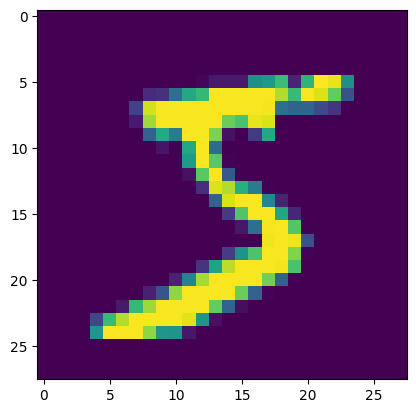

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

### Squeeze the input values to range: 0-1

In [5]:
X_train = X_train/255 # total values 255, divide each value by 255
X_test = X_test/255

### Step 2: Define Layers

In [6]:
model = Sequential()

model.add(Flatten(input_shape=(28,28))) # flatten the 2D data: 28 x 28 to 1D: 784
model.add(Dense(128, activation='relu')) # hidden layer with 128 bias terms/percpetrons
model.add(Dense(10,activation='softmax')) # softmax for multiclass classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### Step 3: Compile the Model

In [8]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# categorical_crossentropy: requires data in one hot encoded form
# sparse_categorical_crossentropy, deal without encoding the data

### Step 4: Model Training

In [9]:
history = model.fit(X_train,y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8662 - loss: 0.4741 - val_accuracy: 0.9559 - val_loss: 0.1555
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9603 - loss: 0.1359 - val_accuracy: 0.9675 - val_loss: 0.1134
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9712 - loss: 0.0960 - val_accuracy: 0.9706 - val_loss: 0.0998
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9811 - loss: 0.0645 - val_accuracy: 0.9696 - val_loss: 0.1028
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9848 - loss: 0.0493 - val_accuracy: 0.9719 - val_loss: 0.0973
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9886 - loss: 0.0391 - val_accuracy: 0.9714 - val_loss: 0.0997
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9918 - loss: 0.0295 - val_accuracy: 0.9722 - val_loss: 0.0969
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9931 - loss: 0.0251 - 

### Step 5: Model Evaluation

In [10]:
y_prob = model.predict(X_test)
y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[9.8331028e-16, 1.6863971e-15, 4.8361478e-11, ..., 9.9999994e-01,
        2.0259600e-14, 3.6411043e-09],
       [3.4278997e-17, 1.7254913e-10, 9.9999994e-01, ..., 1.7137989e-28,
        8.0430085e-10, 1.6677900e-26],
       [6.1398747e-10, 9.9997669e-01, 3.0954320e-07, ..., 2.4611128e-07,
        2.2679604e-05, 1.0684214e-12],
       ...,
       [2.1140602e-32, 7.0250683e-24, 4.1499874e-26, ..., 1.6995005e-15,
        6.1665352e-12, 1.1292967e-08],
       [7.6791223e-23, 2.3508255e-23, 4.9585080e-22, ..., 3.9732260e-21,
        1.6717992e-08, 1.7075265e-22],
       [4.0613746e-19, 4.7506257e-24, 7.6952774e-16, ..., 1.8213324e-28,
        1.3937091e-18, 1.7678225e-21]], dtype=float32)

In [11]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9794

In [13]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

<Axes: >

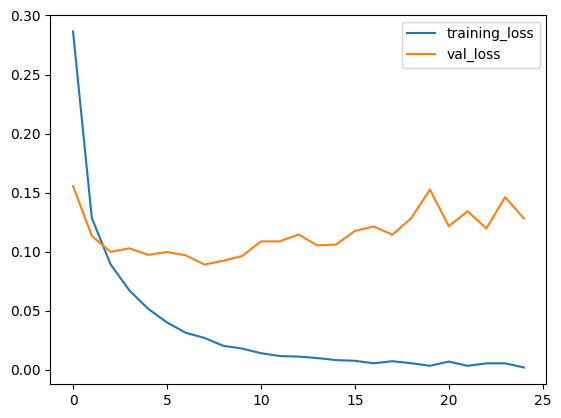

In [14]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.lineplot(history.history['loss'], label="training_loss")
sns.lineplot(history.history['val_loss'], label="val_loss")
# Overfitting: Performing well on training data but validation data.

<Axes: >

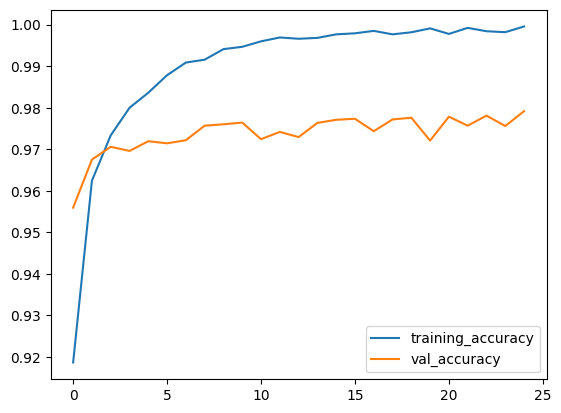

In [15]:
sns.lineplot(history.history['accuracy'],label='training_accuracy')
sns.lineplot(history.history['val_accuracy'],label='val_accuracy')

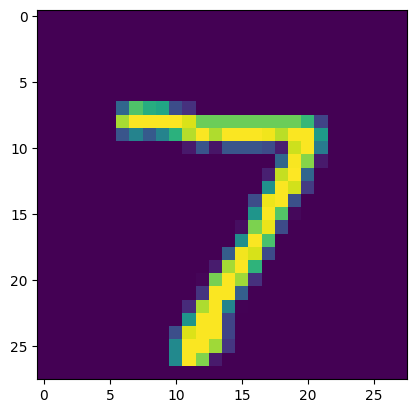

In [16]:
plt.imshow(X_test[0])

In [17]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=-1)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


7